In [1]:
import westernintnet
import sys

sys.path.append("../")

import rap
import pandas as pd
from matplotlib import pyplot

In [2]:
grid = westernintnet.WesternIntNet()
wind_farm = grid.genbus.groupby('type').get_group('wind')

Loading sub
Loading bus2sub
Loading bus
Loading genbus
Loading branches
Loading resources
Loading net_generation
Load solar data
Load wind data
Load hydro data
Load demand data
Done loading


In [3]:
wind_farm.head()

,busID,Pg,Qg,Qmax,Qmin,Vg,mBase,status,Pmax,Pmin,...,mu_Qmax,mu_Qmin,type,lat,lon,GenMWMax,GenMWMin,AreaNum,ZoneName,base_color
plantID,,,,,,,,,,,,,,,,,,,,,
7,10691,59.72,21.07,21.07,-14.24,1.0063,98.92,1,59.72,59.72,...,0.0,0.0000;,wind,45.813100,-120.347500,98.900002,16.648942,1,Washington,#15b01a
10,10699,79.42,-14.50,21.45,-14.50,1.0019,120.64,1,79.42,79.42,...,0.0,0.0000;,wind,47.135600,-120.687200,100.699997,13.150001,1,Washington,#15b01a
11,10703,136.30,25.92,29.03,-19.63,1.0605,174.64,1,136.30,136.30,...,0.0,0.0000;,wind,45.879700,-120.807200,136.300004,43.062568,1,Washington,#15b01a
38,10746,66.35,-12.96,19.17,-12.96,1.0205,98.26,1,66.35,66.35,...,0.0,0.0000;,wind,46.954700,-120.181900,89.999998,19.930001,1,Washington,#15b01a
52,10768,212.51,56.83,56.83,-38.42,1.0304,301.55,1,212.51,212.51,...,0.0,0.0000;,wind,46.421111,-118.026944,266.799998,122.148347,1,Washington,#15b01a


In [4]:
print("There are %d wind farms in the Western grid." % len(wind_farm))

There are 243 wind farms in the Western grid.


In [5]:
data, missing = rap.retrieve_data(wind_farm, start_date='2016-01-01', end_date='2016-01-09')

100%|████████████████████████████████████████████████████████████████████████████████| 216/216 [10:07<00:00,  2.81s/it]


In [6]:
print("There are %d missing files." % len(missing))

There are 33 missing files.


In [7]:
data.set_index('ts', inplace=True, drop=True)
data.drop(['tsID'], axis=1, inplace=True)
data.head()

,plantID,U,V,Pout
ts,,,,
2016-01-01,7,-6.482498,-3.10574,33.909546
2016-01-01,10,-5.482498,5.89426,48.626080
2016-01-01,11,-6.982498,-2.48074,51.586488
2016-01-01,38,-6.357498,-1.60574,23.288450
2016-01-01,52,-2.732498,-3.98074,24.722452


In [8]:
data_oneplant = data[data.plantID == 38]

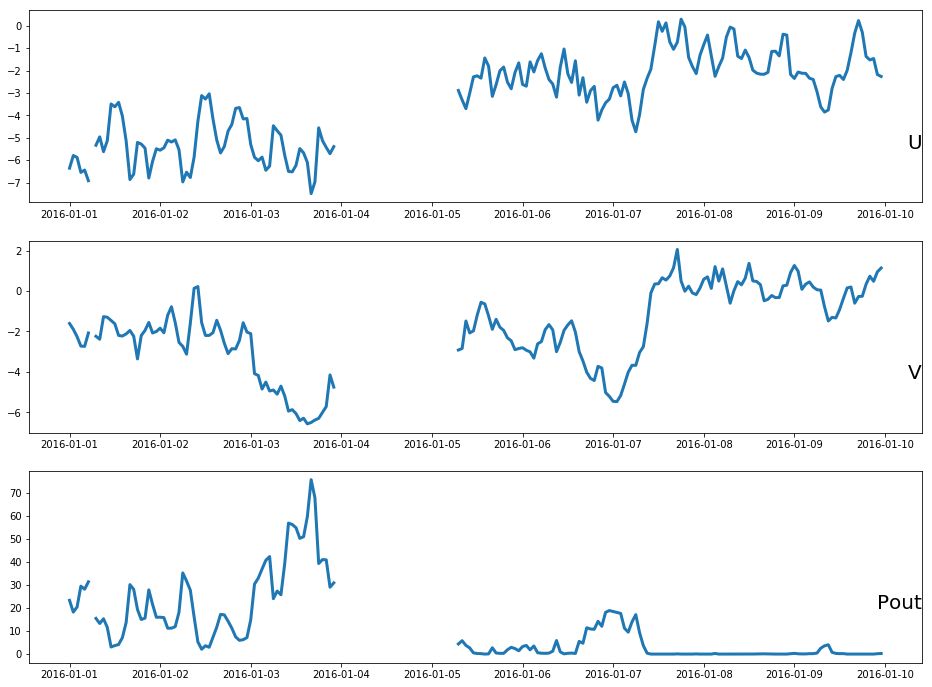

In [9]:
pyplot.figure(figsize=(16,12))
for i in [1,2,3]:
    pyplot.subplot(3,1,i)
    pyplot.plot(data_oneplant.index, data_oneplant.iloc[:,i], lw=3)
    pyplot.title(data_oneplant.columns[i], y=0.25, loc='right', fontsize=20)